In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import random
import seaborn as sns
import requests
import time
import urllib

In [86]:
# Incorporated citipy to determine city based on latitude and longitude
import citipy

In [87]:
# Output File (CSV)
output_data_file = "C:/Users/owner/Desktop/GWbootcamp/GWARL201808DATA3/06-Python-APIs/Homework/Instructions/starter_code/cities.csv"
output_data_file

'C:/Users/owner/Desktop/GWbootcamp/GWARL201808DATA3/06-Python-APIs/Homework/Instructions/starter_code/cities.csv'

In [88]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [89]:
# set up lists lat_lngs and cities to hold response
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


print(f"The latitude information received is: {lats}")
print(f"The lngs information received is: {lngs}")
print(f"The lat_lngs information received is: {lat_lngs}")

The latitude information received is: [ 57.68532152 -74.16462592  83.51643706 ... -76.35857606  25.08279415
  89.71928044]
The lngs information received is: [119.58388154  89.66502232 148.19117136 ... 129.22102857  13.70982003
 108.36993947]
The lat_lngs information received is: <zip object at 0x0445EA30>


In [90]:
# Identifing nearest city for each latitude and longitude
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:cities.append(city)

In [91]:
# Print the city count to confirm sufficient count and unique value
len(cities)

633

In [92]:
# Print the city count to confirm sufficient count and unique value
cities

['khani',
 'busselton',
 'chokurdakh',
 'punta arenas',
 'nikolskoye',
 'ushuaia',
 'jamestown',
 'ilulissat',
 'mount isa',
 'vaini',
 'saleaula',
 'college',
 'hardenberg',
 'kavaratti',
 'tuktoyaktuk',
 'albany',
 'chadiza',
 'lumeje',
 'dakar',
 'provideniya',
 'samusu',
 'port alfred',
 'korla',
 'basco',
 'tripoli',
 'belushya guba',
 'aqtobe',
 'balagansk',
 'ndele',
 'dikson',
 'puerto leguizamo',
 'taolanaro',
 'kisangani',
 'clyde river',
 'castro',
 'new norfolk',
 'yellowknife',
 'toba',
 'rikitea',
 'okhotsk',
 'chapais',
 'lincoln',
 'hasaki',
 'saint anthony',
 'codrington',
 'hungund',
 'utiroa',
 'faanui',
 'pingliang',
 'puerto ayora',
 'odweyne',
 'east london',
 'upernavik',
 'levelland',
 'mataura',
 'tuatapere',
 'hambantota',
 'airai',
 'iqaluit',
 'constitucion',
 'illoqqortoormiut',
 'barentsburg',
 'lebu',
 'lengshuitan',
 'asau',
 'dong hoi',
 'hilo',
 'forestville',
 'bengkulu',
 'verona',
 'narsaq',
 'lagoa',
 'bredasdorp',
 'arraial do cabo',
 'roding',
 '

In [93]:
# Importing weathermap api_key from api_keys.py
from api_keys import api_key

# URL for Weather Map API Call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# setting up lists for cities to hold response
# Result of created city_response_data will be appended
city_response_data = []

# Printing Beginning Data Retrieval and spearation lines to logger
print("Beginning Data Retrieval")
print("------------------------")

# Creating counters for the record counts and set counts
# set count is for cities grouped in sets of 50
record_count = 1
set_count = 1

# Looping through each city from the list
for i, city in enumerate(cities):
        
    # Grouping cities in sets of 50 for logger
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Using urllib from Depdendcies and creating endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Print the url, with record count, set count, and city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Running an API request for each of the cities
    try:
        # Getting request into city_weather_req
        city_weather_req = requests.get(city_url).json()

        # setting up variables- latitude,longitude,max temp,humidity,cloudiness,windspeed,country name, and date from city url
        city_lat = city_weather_req["coord"]["lat"]
        city_lng = city_weather_req["coord"]["lon"]
        city_max_temp = city_weather_req["main"]["temp_max"]
        city_humidity = city_weather_req["main"]["humidity"]
        city_clouds = city_weather_req["clouds"]["all"]
        city_wind = city_weather_req["wind"]["speed"]
        city_country = city_weather_req["sys"]["country"]
        city_date = city_weather_req["dt"]

        #List of city results appended with city_response_data list
        city_response_data.append({"City": city,"Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp,
                          "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind,
                          "Country": city_country, "Date": city_date})

    # If an error occurs, skip the city and print city not found
    except:
        print("City not found. Skipping...")
        pass
              
# Print Data Loading is complete 
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=khani
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=busselton
Processing Record 3 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=chokurdakh
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=punta%20arenas
Processing Record 5 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=nikolskoye
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ushuaia
Processing Record 7 of Set

Processing Record 2 of Set 2 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=upernavik
Processing Record 3 of Set 2 | levelland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=levelland
Processing Record 4 of Set 2 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=mataura
Processing Record 5 of Set 2 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=tuatapere
Processing Record 6 of Set 2 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=hambantota
Processing Record 7 of Set 2 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=airai
Processing Record 8 of Set 2 | iqaluit
http://api.openweathermap.org/data/2.5/weather?

Processing Record 5 of Set 3 | vuktyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=vuktyl
Processing Record 6 of Set 3 | batangafo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=batangafo
Processing Record 7 of Set 3 | zlitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=zlitan
Processing Record 8 of Set 3 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=coihaique
Processing Record 9 of Set 3 | saint-pacome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=saint-pacome
City not found. Skipping...
Processing Record 10 of Set 3 | togur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=togur
Processing Record 11 of Set 3 | padang
http://api.openweather

City not found. Skipping...
Processing Record 8 of Set 4 | sergeyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sergeyevka
Processing Record 9 of Set 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=saskylakh
Processing Record 10 of Set 4 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=lavrentiya
Processing Record 11 of Set 4 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=port%20lincoln
Processing Record 12 of Set 4 | yarada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=yarada
Processing Record 13 of Set 4 | arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=arman
Processing Record 14 of Set 4 | taltal
http://

Processing Record 11 of Set 5 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=broken%20hill
Processing Record 12 of Set 5 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=vestmannaeyjar
Processing Record 13 of Set 5 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=mys%20shmidta
City not found. Skipping...
Processing Record 14 of Set 5 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=atar
Processing Record 15 of Set 5 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=tiksi
Processing Record 16 of Set 5 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=port%20hawkesbury
Processing Record 17 of 

Processing Record 15 of Set 6 | santa lucia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=santa%20lucia
Processing Record 16 of Set 6 | parambu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=parambu
Processing Record 17 of Set 6 | sedelnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sedelnikovo
City not found. Skipping...
Processing Record 18 of Set 6 | lovozero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=lovozero
Processing Record 19 of Set 6 | trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=trelew
Processing Record 20 of Set 6 | kumluca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=kumluca
Processing Record 21 of Set 6 | mayumba
http://a

Processing Record 20 of Set 7 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=beyneu
Processing Record 21 of Set 7 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=guerrero%20negro
Processing Record 22 of Set 7 | jiangyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=jiangyan
Processing Record 23 of Set 7 | formoso do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=formoso%20do%20araguaia
City not found. Skipping...
Processing Record 24 of Set 7 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=gat
Processing Record 25 of Set 7 | mutis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=mutis
Processing Record 26 of Set 7 | na

Processing Record 23 of Set 8 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=adrar
Processing Record 24 of Set 8 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=lasa
Processing Record 25 of Set 8 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=cap%20malheureux
Processing Record 26 of Set 8 | flagstaff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=flagstaff
Processing Record 27 of Set 8 | yei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=yei
City not found. Skipping...
Processing Record 28 of Set 8 | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ozgon
City not found. Skipping...
Processing Record 29 of Set 8 | maues
ht

Processing Record 25 of Set 9 | ochamchira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=ochamchira
Processing Record 26 of Set 9 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=komsomolskiy
Processing Record 27 of Set 9 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=srednekolymsk
Processing Record 28 of Set 9 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=klyuchi
Processing Record 29 of Set 9 | duma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=duma
Processing Record 30 of Set 9 | cape coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=cape%20coast
Processing Record 31 of Set 9 | port-gentil
http://api.openweath

Processing Record 29 of Set 10 | shkotovo-26
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=shkotovo-26
City not found. Skipping...
Processing Record 30 of Set 10 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sisimiut
Processing Record 31 of Set 10 | luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=luganville
Processing Record 32 of Set 10 | kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=kilindoni
Processing Record 33 of Set 10 | allapalli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=allapalli
Processing Record 34 of Set 10 | chalus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=chalus
Processing Record 35 of Set 10 | tongc

Processing Record 32 of Set 11 | babusnica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=babusnica
Processing Record 33 of Set 11 | sombrerete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sombrerete
Processing Record 34 of Set 11 | filadelfia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=filadelfia
Processing Record 35 of Set 11 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=sioux%20lookout
Processing Record 36 of Set 11 | turan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=turan
Processing Record 37 of Set 11 | jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=jizan
Processing Record 38 of Set 11 | almendralejo
http://api.openweath

Processing Record 35 of Set 12 | voyvozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=voyvozh
Processing Record 36 of Set 12 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=kruisfontein
Processing Record 37 of Set 12 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=udachnyy
Processing Record 38 of Set 12 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=palmer
Processing Record 39 of Set 12 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=hihifo
City not found. Skipping...
Processing Record 40 of Set 12 | balestrand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ca5b364dcd74d0edbcb5345c703265a&q=balestrand
Processing Record 41 of Set 12 | rio grande
ht

In [94]:
# Converting array of JSONs to create a Pandas DataFrame called city_weather_data_pd
city_weather_data_pd = pd.DataFrame(city_response_data)

# Extracting required variables-lat,max temp, humudity, cloudiness, and windspeed from the city_weather_data_pd dataframe for the scatter plot analysis
lats = city_weather_data_pd["Lat"]
max_temps = city_weather_data_pd["Max Temp"]
humidity = city_weather_data_pd["Humidity"]
cloudiness = city_weather_data_pd["Cloudiness"]
wind_speed = city_weather_data_pd["Wind Speed"]

# Exporting into a csv with the output data file created 
city_weather_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_weather_data_pd.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [95]:
# Display the City Data Frame with selected variables
city_weather_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,khani,0,GE,1538969400,45,41.96,42.96,66.20,31.09
1,busselton,92,AU,1538971029,100,-33.64,115.35,61.18,8.61
2,chokurdakh,64,RU,1538971060,96,70.62,147.90,26.98,8.84
3,punta arenas,75,CL,1538967600,69,-53.16,-70.91,39.20,11.41
4,nikolskoye,0,RU,1538967600,92,59.70,30.79,30.20,4.47


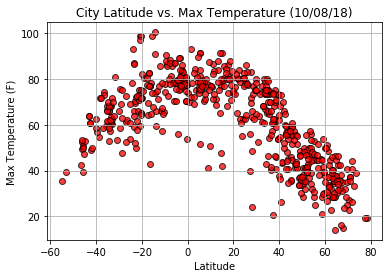

In [96]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, 
            marker="o", facecolors="red",alpha=0.75, label="Cities")

# Labeling
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Saving the figure to the output folder
plt.savefig("C:/Users/owner/Desktop/GWbootcamp/GWARL201808DATA3/06-Python-APIs/Homework/Instructions/starter_code/Scatter_Lat_temp.png")

# Show plot
plt.show()

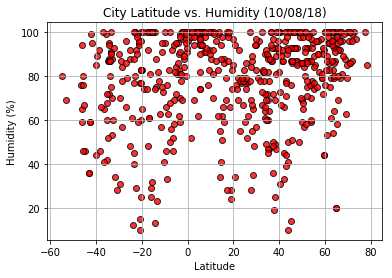

In [97]:
# Build the scatter plots for each city types
plt.scatter(lats,humidity,edgecolor="black", linewidths=1, marker="o", 
            facecolors="red",alpha=0.8, label="Cities")

# Labeling
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output folder
plt.savefig("C:/Users/owner/Desktop/GWbootcamp/GWARL201808DATA3/06-Python-APIs/Homework/Instructions/starter_code/Scatter_Lat_humudity.png")

# Show plot
plt.show()

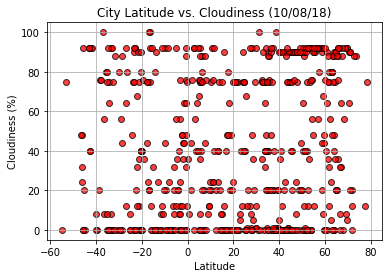

In [98]:
# Build the scatter plots for each city types
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, 
            marker="o", facecolors="red", alpha=0.75, label="Cities")

# Labeling
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output folder
plt.savefig("C:/Users/owner/Desktop/GWbootcamp/GWARL201808DATA3/06-Python-APIs/Homework/Instructions/starter_code/Scatter_Lat_cloudiness.png")

# Show plot
plt.show()

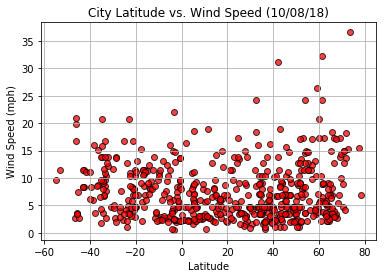

In [99]:
# Build the scatter plots for each city types
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1,
            marker="o", facecolors="red", alpha=0.75, label="Cities")

# Labeling
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure in the output folder
plt.savefig("C:/Users/owner/Desktop/GWbootcamp/GWARL201808DATA3/06-Python-APIs/Homework/Instructions/starter_code/Scatter_Lat_wind_speed.png")

# Show plot
plt.show()